<a href="https://colab.research.google.com/github/thhtruc/NeuralNetwork/blob/main/Intro_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Single layer neural networks."""

import torch 


def sigmoid_function(x):
  """Sigmoid activation function."""
  return 1/(1 + torch.exp(-x))

torch.manual_seed(7) # Set the random seed so things are predictable
features = torch.randn((1, 5)) # Features are 5 random normal variables
# contains values randomly distributed according to the normal distribution with mean of zero and standard devision of one
weights = torch.randn_like(features) #True weights for our data, random normal variables again, normal distribution
bias = torch.randn((1, 1)) # and a true bias term


In [ ]:
#The output of single layer network
y1 = sigmoid_function(torch.sum(features * weights) + bias)
print("output=", y1)
y2 = sigmoid_function((features * weights).sum() + bias)
print("output=", y2)
y3 = sigmoid_function(torch.matmul(features, weights.view(5, 1)) + bias)
print("output=", y3)

output= tensor([[0.1595]])
output= tensor([[0.1595]])
output= tensor([[0.1595]])


In [ ]:
### Network Using Matrix Multiplication
features = torch.randn((1, 3)) # 3 features 

# define the size of each layer in our network
n_input = features.shape[1]
n_hidden = 2
n_output = 1

# weights 
w1 = torch.randn(n_input, n_hidden)
w2 = torch.randn(n_hidden, n_output)
# bias
b1 = torch.randn((1, n_hidden))
b2 = torch.randn((1, n_output))


In [ ]:
Y1 = sigmoid_function(torch.matmul(features, w1) + b1)
Y2 = sigmoid_function(torch.matmul(Y1, w2) + b2)
print("output", Y2)

output tensor([[0.8805]])


In [ ]:
### Neural Network

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'


import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

#define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])


In [ ]:
#download and load the training data
trainset = datasets.MNIST('TRAIN_SET', download=True, train=True, transform=transform)
valset = datasets.MNIST('VAL_SET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### the batch size is the number of images we get in one iteration from data loader
# and pass through network
### Shuffle=True - shuffle the dataset everytime we start going through the data loader again


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting TRAIN_SET/MNIST/raw/train-images-idx3-ubyte.gz to TRAIN_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting TRAIN_SET/MNIST/raw/train-labels-idx1-ubyte.gz to TRAIN_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting TRAIN_SET/MNIST/raw/t10k-images-idx3-ubyte.gz to TRAIN_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting TRAIN_SET/MNIST/raw/t10k-labels-idx1-ubyte.gz to TRAIN_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)



Extracting VAL_SET/MNIST/raw/train-images-idx3-ubyte.gz to VAL_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting VAL_SET/MNIST/raw/train-labels-idx1-ubyte.gz to VAL_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting VAL_SET/MNIST/raw/t10k-images-idx3-ubyte.gz to VAL_SET/MNIST/raw




Extracting VAL_SET/MNIST/raw/t10k-labels-idx1-ubyte.gz to VAL_SET/MNIST/raw



In [ ]:
print(type(trainloader))
print(type(trainset))

<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torchvision.datasets.mnist.MNIST'>


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


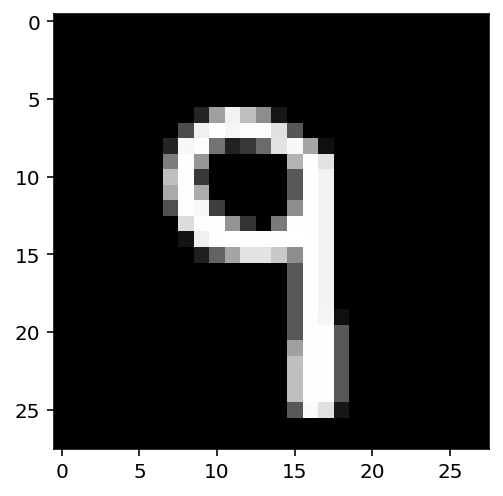

In [ ]:
import numpy


plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

In [ ]:
def sigmoid_function(x):
  """Sigmoid activation function."""
  return 1/(1 + torch.exp(-x))


In [ ]:
n_input = 784
n_hidden = 256
n_output = 10

input = images.view(images.shape[0], -1)
# weights 
w1 = torch.randn(n_input, n_hidden)
w2 = torch.randn(n_hidden, n_output)

# bias
b1 = torch.randn((1, n_hidden))
b2 = torch.randn((1, n_output))

Y1 = sigmoid_function(torch.mm(input, w1) + b1)
Y2 = torch.mm(Y1, w2) + b2
print("output", Y2)
print(Y2.shape)

output tensor([[ 8.1502e+00,  1.1670e+01,  1.6444e+01,  4.5166e+00,  1.5948e+01,
          2.9211e+00, -1.2643e+01, -4.6858e+00,  2.0036e+00,  4.4896e+00],
        [ 8.9072e+00,  5.9933e+00,  2.3604e+01,  8.9465e+00,  2.8985e-01,
         -9.7394e+00,  1.3060e+00, -5.9346e+00,  1.6777e+00,  3.1921e+00],
        [-2.3110e-01,  1.6994e+00,  2.1913e+01,  4.6162e+00,  1.3632e+01,
         -5.4731e+00, -5.2708e-01, -1.0379e+01,  8.3070e+00,  3.7390e+00],
        [ 3.1307e+00,  1.4458e+01,  2.0701e+01, -7.7177e+00,  8.4828e+00,
          1.1062e+01, -6.0130e+00, -1.5181e+01,  1.2158e+01,  8.3059e+00],
        [ 3.6240e+00,  1.6774e+01,  2.0131e+01, -6.9610e+00,  6.2905e-01,
         -1.6160e+00,  1.5277e+00, -1.5341e+01,  9.2966e+00,  9.4053e+00],
        [ 4.9905e+00,  5.5226e+00,  2.6764e+01,  7.2042e+00, -6.3325e+00,
         -2.4006e+00, -3.9317e+00, -1.3704e+01,  4.6040e+00,  1.6452e+01],
        [-4.5822e+00,  1.6967e+01,  2.8464e+01,  5.1986e+00,  2.9789e-01,
         -1.1002e+01, -7.

In [ ]:
def softmax_function(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [ ]:
Y_probabilities = softmax_function(Y2)
print(Y_probabilities.shape)
print(Y_probabilities)
print(Y_probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([[1.5457e-04, 5.2206e-03, 6.1834e-01, 4.0837e-06, 3.7628e-01, 8.2822e-07,
         1.4411e-13, 4.1163e-10, 3.3090e-07, 3.9751e-06],
        [4.1424e-07, 2.2480e-08, 1.0000e+00, 4.3085e-07, 7.4954e-11, 3.3048e-15,
         2.0707e-10, 1.4844e-13, 3.0029e-10, 1.3654e-09],
        [2.4140e-10, 1.6639e-09, 9.9975e-01, 3.0754e-08, 2.5314e-04, 1.2769e-12,
         1.7955e-10, 9.4530e-15, 1.2325e-06, 1.2792e-08],
        [2.3355e-08, 1.9401e-03, 9.9779e-01, 4.5394e-13, 4.9294e-06, 6.5027e-05,
         2.4965e-12, 2.6040e-16, 1.9458e-04, 4.1299e-06],
        [6.5474e-08, 3.3668e-02, 9.6629e-01, 1.6560e-12, 3.2763e-09, 3.4704e-10,
         8.0471e-09, 3.7995e-16, 1.9040e-05, 2.1226e-05],
        [3.4973e-10, 5.9540e-10, 9.9997e-01, 3.2000e-09, 4.2287e-15, 2.1569e-13,
         4.6652e-14, 2.6600e-18, 2.3761e-10, 3.3234e-05],
        [4.4483e-15, 1.0156e-05, 9.9999e-01, 7.8698e-11, 5.8560e-13, 7.2472e-18,
         1.7775e-16, 8.3231e-17, 1.3095e-12, 5.0632e-11],
      

In [ ]:
### Building networks with Pytorch using nn module


from torch import nn


class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784, 256)
    self.output = nn.Linear(256, 10)
    self.sigmoid = nn.Sigmoid()
    self.sofmax = nn.Softmax(dim=1)
  
  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.sofmax(x)
    return x


In [ ]:
model = NeuralNetwork()
model

NeuralNetwork(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (sofmax): Softmax(dim=1)
)

In [ ]:
import torch.nn.functional as F


class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784, 256)
    self.output = nn.Linear(256, 10)
  
  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim=1)
    return x

In [ ]:
model = NeuralNetwork()
model

NeuralNetwork(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
import torch.nn.functional as F


class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(784, 128)
    self.layer2 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)
  
  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.softmax(self.output(x), dim=1)
    return x

In [ ]:
###Autograd
# turn on or off gradients with torch.set_grad_enabled(True|False)
x = torch.randn((2, 2), requires_grad=True)
y = x**2
y = y.mean()
y.backward()
print(x.grad)
print(x/2)

tensor([[-0.9867,  0.6642],
        [-0.5859,  0.1327]])
tensor([[-0.9867,  0.6642],
        [-0.5859,  0.1327]], grad_fn=<DivBackward0>)


In [ ]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
#define the loss
criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, labels)
print(loss)

tensor(2.2973, grad_fn=<NllLossBackward>)


In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
print(model[0].weight.grad)
loss = loss.mean()
loss.backward()
print(model[0].weight.grad)

None
tensor([[-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [ ]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)
#clear the gradients
optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient - ', model[0].weight.grad)

Gradient -  tensor([[ 0.0023,  0.0023,  0.0023,  ...,  0.0023,  0.0023,  0.0023],
        [ 0.0048,  0.0048,  0.0048,  ...,  0.0048,  0.0048,  0.0048],
        [-0.0050, -0.0050, -0.0050,  ..., -0.0050, -0.0050, -0.0050],
        ...,
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0024, -0.0024, -0.0024,  ..., -0.0024, -0.0024, -0.0024],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [ ]:
optimizer.step()
print('Update weights - ', model[0].weight)

Update weights -  Parameter containing:
tensor([[-0.0120, -0.0149,  0.0344,  ...,  0.0126,  0.0101, -0.0083],
        [ 0.0234,  0.0140, -0.0305,  ..., -0.0037,  0.0142, -0.0129],
        [-0.0178, -0.0352, -0.0022,  ...,  0.0192,  0.0269, -0.0050],
        ...,
        [-0.0032,  0.0261, -0.0106,  ...,  0.0216, -0.0035,  0.0241],
        [ 0.0282,  0.0327, -0.0231,  ..., -0.0196,  0.0102, -0.0140],
        [-0.0052,  0.0309,  0.0048,  ..., -0.0207, -0.0038,  0.0178]],
       requires_grad=True)


In [ ]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.Softmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: -0.10008049174062987
Training loss: -0.1000830648280283
Training loss: -0.10008245789165944
Training loss: -0.10008251427142605
Training loss: -0.10008311094537473


In [ ]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits, dim=1)
helper.view

AttributeError: ignored